<div style="color: #40E0D0; font-family: Cambria, serif; text-align: center; margin: 20px;">

<div style="font-size: 32px; font-weight: bold; margin-bottom: 15px;">Autocallable Contingent Coupon Equity Linked Securities Linked to the VanEck Vectors® Junior Gold Miners ETF Due July 21, 2025</div>

<div style="font-size: 18px; margin-bottom: 15px;">
<a href="https://www.sec.gov/Archives/edgar/data/200245/000148105724000574/form424b2.htm" style="color: #40E0D0;">SEC Filing Link to the Security
</a>
</div>

<div style="font-size: 24px; font-weight: bold; margin-bottom: 15px;">Payments on the Securities Based on the Konck-In event </div>

<div style="font-style: italic; font-size: 16px;">-Valuation report Python notebook by Yadvesh, Krish and Mayank</div>

</div>

#### Group Members (NetID)
* Krish Desai (kcdesai2)
* Mayank Kalra (mkalra2)
* Yadvesh Yadav (yyada)

---

<div style="border-bottom: 3px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 28px;">I) Introduction ==></span>
</div>

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">1) Below are the Key Dates of the Note:</span>
</div>

![](./images_project_3/key_dates.png)

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">2) Below are the Note Offering:</span>
</div>

![](./images_project_3/note_offering.png)

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">3) Below are the Observation Dates, Auto Call Dates and Coupon Payment Dates:</span>
</div>

![](./images_project_3/obs_cpn_dates.png)

---

<div style="border-bottom: 3px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 28px;">II) Bloomberg Data (Risk-Free Rates(OIS), Dividend Yield and Volatality Matrix) is as follows ==> </span>
</div>

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">1) Risk Free Rate (OIS Rate):</span>
</div>

![](./images_project_3/ois.png)

---

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">2) Dividend Yield for VanEck Vectors® Junior Gold Miners ETF:</span>
</div>

![](./images_project_3/div.png)

---

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">3) Implied Volatality Matrix for VanEck Vectors® Junior Gold Miners ETF:</span>
</div>

![](./images_project_3/vols.png)

---

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 28px;">III) Getting the Risk-free rates from discount factors above ==></span>
</div>

In [1]:
# Importing Necessary Libraries
from datetime import datetime, timedelta
import calendar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from pandas.tseries.holiday import USFederalHolidayCalendar

In [2]:
# function to get fractional difference between two dates
def get_year_fraction(start_date, end_date):
    if isinstance(start_date, str):
        start_date = datetime.strptime(start_date, "%Y-%m-%d")
    if isinstance(end_date, str):
        end_date = datetime.strptime(end_date, "%Y-%m-%d")
    
    total_years = 0.0

    current_date = start_date
    while current_date < end_date:
        year = current_date.year
    
        if year == end_date.year:
            period_end = end_date
        else:
            period_end = datetime(year + 1, 1, 1)

        days_in_period = (period_end - current_date).days
        days_in_year = 366 if calendar.isleap(year) else 365
        total_years += days_in_period / days_in_year
        current_date = period_end
    
    return total_years

In [3]:
# Key dates
T_0 = "2024-01-16"
T_1 = "2024-01-19"
T_2 = "2025-07-16"
T_3 = "2025-07-21"

# Discount Factors at Key Dates
DF_0 = 1

# DF_1, DF_2 and DF_3 needs to be calculated using Interpolation
# We have:
# For DF1
dt_2024_01_24 = "2024-01-24"
DF_2024_01_24 = 0.998817

# For DF2
dt_2025_01_17 = "2025-01-17"
DF_2025_01_17 = 0.955098
dt_2025_07_17 = "2025-07-17"
DF_2025_07_17 = 0.939127

# For DF3
dt_2026_01_20 = "2026-01-20"
DF_2026_01_20 = 0.924274

# Now using Interpolation we have:
DF_1 = DF_0 + (DF_2024_01_24 - DF_0)*(get_year_fraction(T_0, T_1))/(get_year_fraction(T_0, dt_2024_01_24))
print(f"The Value of DF_1 is: {DF_1:.6f}\n")
DF_2 = DF_2025_01_17 + (DF_2025_07_17 - DF_2025_01_17)*(get_year_fraction(dt_2025_01_17, T_2))/(get_year_fraction(dt_2025_01_17, dt_2025_07_17))
print(f"The Value of DF_2 is: {DF_2:.6f}\n")
DF_3 = DF_2025_07_17 + (DF_2026_01_20 - DF_2025_07_17)*(get_year_fraction(dt_2025_07_17, T_3))/(get_year_fraction(dt_2025_07_17, dt_2026_01_20))
print(f"The Value of DF_3 is: {DF_3:.6f}")

The Value of DF_1 is: 0.999556

The Value of DF_2 is: 0.939215

The Value of DF_3 is: 0.938809


<div style="border-bottom: 2px solid black; display: inline-block; margin-bottom: 20px;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">The Discount Factor Table after Linear Interpolation Looks like this</span>
</div>

<div style="font-family: Cambria, serif;">

| Keys | Dates     | DF        |
|------|-----------|-----------|
| T_0  | 01/16/2024  | 1.000000  |
| T_1  | 01/19/2024 | 0.999556  |
| T_2  | 07/16/2025 | 0.939215  |
| T_3  | 07/21/2025 | 0.938809  |

</div>

In [4]:
# function to get r(0,T) from the discount factors DF
def r_from_DF(DF, T, T_0):
    dt = get_year_fraction(T_0, T)
    r = -np.log(DF)/dt
    return r, dt

In [5]:
r_T0_T1, T0_T1 = r_from_DF(DF_1, T_1, T_0)
print(f"The Value of continuously compounded risk free rate between T_0 and T_1(r_T0_T1) is: {r_T0_T1:.8f}\n")
r_T0_T2, T0_T2 = r_from_DF(DF_2, T_2, T_0)
print(f"The Value of continuously compounded risk free rate between T_0 and T_2(r_T0_T2) is: {r_T0_T2:.8f}\n")
r_T0_T3, T0_T3 = r_from_DF(DF_3, T_3, T_0)
print(f"The Value of continuously compounded risk free rate between T_0 and T_3(r_T0_T3) is: {r_T0_T3:.8f}\n")

The Value of continuously compounded risk free rate between T_0 and T_1(r_T0_T1) is: 0.05413426

The Value of continuously compounded risk free rate between T_0 and T_2(r_T0_T2) is: 0.04191878

The Value of continuously compounded risk free rate between T_0 and T_3(r_T0_T3) is: 0.04182478



<div style="border-bottom: 2px solid black; display: inline-block; margin-bottom: 20px;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">The Discount Factor Table after Linear Interpolation Looks like this</span>
</div>

<div style="font-family: Cambria, serif;">

| Keys | Dates     | DF        | delta(T_x, T_0) | r(0,T_x)   |
|------|-----------|-----------|-----------------|------------|
| T_0  | 01/16/2024  | 1.000000  | 0.00000000     | 0.00000000 |
| T_1  | 01/19/2024 | 0.999556 | 0.00819672     | 0.05413426 |
| T_2  | 07/16/2025 | 0.939215 | 1.49600269    | <span style="background-color: green;">0.04191878</span> |
| T_3  | 07/21/2025 | 0.938809   | 1.50970132     | 0.04182478 |

</div>

In [6]:
# now we need to calculate teh forward rate F(T_1,T_3)
T1_T3 = get_year_fraction(T_1, T_3)
F_T1_T3 = ((r_T0_T3*T0_T3) - (r_T0_T1*T0_T1))/T1_T3
print(f"The Value of continuously compounded Forward rate between T_1 and T_3(F_T1_T3) is: {F_T1_T3:.8f}\n")

The Value of continuously compounded Forward rate between T_1 and T_3(F_T1_T3) is: 0.04175758



---

<div style="border-bottom: 2px solid black; display: inline-block; margin-bottom: 20px;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">1) The Discount Factor Table after Linear Interpolation Looks like this:</span>
</div>

<div style="font-family: Cambria, serif;">

| Keys | Dates     | DF        | delta(T_x, T_0) | r(0,T_x)   | F(T_x1,T_x2)   |
|------|-----------|-----------|-----------------|------------|------------|
| T_0  | 01/16/2024  | 1.000000  | 0.00000000     | 0.00000000 | -  |
| T_1  | 01/19/2024 | 0.999556 | 0.00819672     | 0.05413426 | -  |
| T_2  | 07/16/2025 | 0.939215 | 1.49600269    | <span style="background-color: green;">0.04191878</span> | -  |
| T_3  | 07/21/2025 | 0.938809   | 1.50970132     | 0.04182478 |<span style="background-color: green;">0.04175758</span> |

</div>

---

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">2) The continuous dividend yield 'D' for GDXJ US Equity from bloomberg data is 1.807% or 0.01807</span>
</div>

---

<div style="border-bottom: 2px solid black; display: inline-block; margin-bottom: 20px;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">3) The Moneyness and Volatility Matrices Looks like this:</span>
</div>

<div style="font-family: Cambria, serif;">

| Moneyness | GDX Implied Volatility (18M) |
|-----------|------------------|
| 70.00     | 39.547%         |
| 75.00     | 38.099%         |
| 80.00     | 36.785%         |
| 85.00     | 35.924%         |
| 90.00     | 35.335%         |
| 95.00     | 35.164%         |
| 100.00    | 35.212%         |
| 105.00    | 35.554%         |
| 110.00    | 36.095%         |

</div>

---

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 28px;">IV) Now Calculating the Value of the Note using Explicit Finite Difference Methods ==></span>
</div>

#### The P.D.E. for this kind of derivative with dividend yield will be:

$$\frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2\frac{\partial^2 V}{\partial S^2} + (r_1-D)\frac{\partial V}{\partial S} - r_2V = 0$$

where:
- $r_1 = r(0,T_2)$ (Used for modeling the stochastic process)
- $r_2 = F(T_1,T_3)$ (Used for discounting)
- D is the Continuous Dividend Yield of the underlying asset(S) 

In [7]:
# note feature inputs that will go in the functions to calculate the value of the note

# Initial Index Values
S0 = 34.66
print(f"The Initial Index Value for GDXJ US Equity is: {S0}\n")

# number of S-steps
jmax = 300
print(f"The Number of S-steps (jmax) is: {jmax}\n")

# deafult volatility is taken at 95 moneyness (sig = 0.35164) and max sigma at 70 moneyness (sig_max = 0.39547)
sig = 0.35164
sig_max = 0.39547
print(f"The Default Implied Volatility at 95 moneyness is: {sig}\nAnd the maximum implied volatility at 70 moneyness is: {sig_max}\n")

# Time for the Note till final valuation date is T0_T2 and total days tot_days will be:
T = T0_T2
tot_days = (datetime.strptime(T_2, "%Y-%m-%d") - datetime.strptime(T_0, "%Y-%m-%d")).days
print(f"The time to maturity T is: {T:.3f}\nAnd the number of days in between the Pricing Date(01/16/2024) and Final Valuation Date(07/16/2025) are: {tot_days}\n")


# By stability condition, the minimum time steps should be: (We have taken corresponding to maximum volatility so that our model is valid for entire volatility matrix)
imax_min = (jmax**2)*(sig_max**2)*T
print(f"The minimum time steps required that satify teh stability condition should be: {imax_min:.2f}\n")

# getting the nearest integer which is a multiple of days in between the pricing and valuation date and just greater than minimum required time steps
coef = np.ceil(imax_min/tot_days)
imax = coef*tot_days
print(f"The Number of time-steps (imax) after satisfying the stability condition and is a multiple of {tot_days} is: {imax}\n")

# continously compounded risk-free rate(T_0 to T_2) for Stochastic Process
r1 = r_T0_T2
print(f"The continously compounded risk-free rate for Stock-Tree simulation is: {r1:.8f}\n")

# continously compounded forward rate(T_1 to T_3) for discounting
r2 = F_T1_T3
print(f"The continously compounded risk-free rate which is used for discounting is: {r2:.8f}\n")

# continuous dividend yields for GDXJ US Equity
D = 0.01807
print(f"The continuous dividend yield for GDXJ US Equity is: {D}\n")

# stated principal amount
principal = 1000
print(f"The stated principal amount is: ${principal}\n")

# contingent coupon payment
cpn = 0.035625*principal
print(f"The contingent coupon payment is: ${cpn}\n")

# Knock-in Value
KI = 0.7*S0
print(f"The Knock-in Value for GDXJ US Equity is: {KI:.3f}\n")

# Coupon Barrier Value
CB = 0.7*S0
print(f"The Coupon Barrier Value for GDXJ US Equity is: {CB:.3f}\n")

# Minimum S value
SL = 0
print(f"The Minimum S Value for GDXJ US Equity is: {SL:.2f}\n")

SU = 3*S0
print(f"The Maximum S Value for GDXJ US Equity is: {SU:.2f}\n")

The Initial Index Value for GDXJ US Equity is: 34.66

The Number of S-steps (jmax) is: 300

The Default Implied Volatility at 95 moneyness is: 0.35164
And the maximum implied volatility at 70 moneyness is: 0.39547

The time to maturity T is: 1.496
And the number of days in between the Pricing Date(01/16/2024) and Final Valuation Date(07/16/2025) are: 547

The minimum time steps required that satify teh stability condition should be: 21057.27

The Number of time-steps (imax) after satisfying the stability condition and is a multiple of 547 is: 21333.0

The continously compounded risk-free rate for Stock-Tree simulation is: 0.04191878

The continously compounded risk-free rate which is used for discounting is: 0.04175758

The continuous dividend yield for GDXJ US Equity is: 0.01807

The stated principal amount is: $1000

The contingent coupon payment is: $35.625

The Knock-in Value for GDXJ US Equity is: 24.262

The Coupon Barrier Value for GDXJ US Equity is: 24.262

The Minimum S Value 

In [8]:
# function to calculate teh note value 
def note_value(S0, K, T, r1, r2, D, sig, SU, jmaxmin, jmaxmax, jmaxstep, imax, cpn):
    expfd_result = []
    jmaxmin = int(jmaxmin)
    jmaxmax = int(jmaxmax)
    jmaxstep = int(jmaxstep)
    imax= int(imax)
    
    for jmax in range(jmaxmin, jmaxmax, jmaxstep): 
        # initialize grids
        V = np.zeros([imax+1, jmax+1])
        VN = np.zeros([imax+1, jmax+1])
        A = np.zeros([jmax+1])
        B = np.zeros([jmax+1])
        C = np.zeros([jmax+1])

        # step sizes
        dt = T/imax
        dS = SU/jmax

        # time indices for observation and payment dates
        tcall = [91/365, 182/365, 274/365, 366/365, 456/365, 547/365]
        tcalls = [94/365, 185/365, 279/365, 371/365, 461/365, 552/365]
        
        TC1 = [i/dt for i in tcall]
        TC = [int(i) for i in TC1]
        TCS1 = [i/dt for i in tcalls]
        TCS = [int(i) for i in TCS1]
        
        Tcpn = tcall[:-1]
        Tcpp = tcalls[:-1]
        Tcpn1 = [i/dt for i in Tcpn]
        Tcp = [int(i) for i in Tcpn1]
        Tcpay1 = [i/dt for i in Tcpp]
        Tcpay = [int(i) for i in Tcpay1]

        # terminal condition for knocked-in state
        i = imax
        for j in range(0, jmax+1):    
            if j*dS <= K:
                V[i,j] = (1000*j*dS/S0) * np.exp(-r2*(3/365))
            elif j*dS > K and j*dS < S0:
                V[i,j] = ((1000*(j*dS/S0))+cpn) * np.exp(-r2*(3/365))
            elif j*dS >= S0:
                V[i,j] = (1000+cpn) * np.exp(-r2*(3/365))

            A[j] = (0.5*(sig**2)*(j**2) + 0.5*(r1 - D)*j)*dt
            B[j] = 1 - (r2*dt) - ((sig**2)*(j**2)*dt)
            C[j] = (0.5*(sig**2)*(j**2) - 0.5*(r1 - D)*j)*dt

        # backward induction for knocked-in state
        for i in range(imax-1, TC[0]-1, -1):
            # lower boundary
            V[i,0] = 0

            # regular finite differences
            for j in range(1, jmax):
                V[i,j] = A[j]*V[i+1,j+1] + B[j]*V[i+1,j] + C[j]*V[i+1,j-1]
                if i in TC and j*dS > S0:
                    V[i,j] = (1000+cpn) * np.exp(-r2*(TCS[TC.index(i)]-TC[TC.index(i)])*dt)
                elif i in TC and j*dS > K and j*dS <= S0:
                    V[i,j] += cpn * np.exp(-r2*(TCS[TC.index(i)]-TC[TC.index(i)])*dt)

            # upper boundary
            if i in TC:
                V[i,jmax] = (1000+cpn) * np.exp(-r2*(TCS[TC.index(i)]-TC[TC.index(i)])*dt)
            else:
                for n in range(len(TC)-1):
                    if TC[n] < i < TC[n+1]:
                        V[i,jmax] = (1000+cpn) * np.exp(-r2*(TCS[n+1]-i)*dt)

        # values before first call date
        for i in range(TC[0]-1, -1, -1):
            # lower boundary
            V[i,0] = 0

            # regular finite differences
            for j in range(1, jmax):
                V[i,j] = A[j]*V[i+1,j+1] + B[j]*V[i+1,j] + C[j]*V[i+1,j-1]
                if i in Tcp and j*dS > K:
                    V[i,j] += cpn * np.exp(-r2*(Tcpay[Tcp.index(i)]-Tcp[Tcp.index(i)])*dt)

            # upper boundary handling
            if i <= Tcp[0]:
                V[i,jmax] = (1000+cpn)*np.exp(-r2*(TCS[0]-i)*dt)
                for n in range(len(Tcp)):
                    V[i,jmax] += cpn*np.exp(-r2*(Tcpay[n]-i)*dt)

            for n in range(len(Tcp)-1):
                if Tcp[n] < i <= Tcp[n+1]:
                    V[i,jmax] = (1000+cpn)*np.exp(-r2*(TCS[0]-i)*dt)
                    for k in range(n+1, len(Tcp)):
                        V[i,jmax] += cpn*np.exp(-r2*(Tcpay[k]-i)*dt)

        # calculate values for not knocked-in state
        jn = int(K/dS)
        
        # copy values below barrier
        for i in range(imax+1):
            for j in range(jn+1):
                VN[i,j] = V[i,j]

        # terminal condition above barrier
        i = imax
        for j in range(jn+1, jmax+1):    
            VN[i,j] = (1000+cpn) * np.exp(-r2*(3/365))

        # backward induction above barrier
        for i in range(imax-1, TC[0]-1, -1):
            for j in range(jn+1, jmax):
                VN[i,j] = A[j]*VN[i+1,j+1] + B[j]*VN[i+1,j] + C[j]*VN[i+1,j-1]
                if i in TC and j*dS > S0:
                    VN[i,j] = (1000+cpn) * np.exp(-r2*(TCS[TC.index(i)]-TC[TC.index(i)])*dt)
                elif i in TC and j*dS > K and j*dS <= S0:
                    VN[i,j] += cpn * np.exp(-r2*(TCS[TC.index(i)]-TC[TC.index(i)])*dt)

            # upper boundary
            if i in TC:
                VN[i,jmax] = (1000+cpn) * np.exp(-r2*(TCS[TC.index(i)]-TC[TC.index(i)])*dt)
            else:
                for n in range(len(TC)-1):
                    if TC[n] < i < TC[n+1]:
                        VN[i,jmax] = (1000+cpn)*np.exp(-r2*(TCS[n+1]-i)*dt)

        # values before first call date
        for i in range(TC[0]-1, -1, -1):
            for j in range(jn+1, jmax):
                VN[i,j] = A[j]*VN[i+1,j+1] + B[j]*VN[i+1,j] + C[j]*VN[i+1,j-1]
                if i in Tcp and j*dS > K:
                    VN[i,j] += cpn * np.exp(-r2*(Tcpay[Tcp.index(i)]-Tcp[Tcp.index(i)])*dt)

            # upper boundary handling
            if i <= Tcp[0]:
                VN[i,jmax] = (1000+cpn)*np.exp(-r2*(TCS[0]-i)*dt)
                for n in range(len(Tcp)):
                    VN[i,jmax] += cpn*np.exp(-r2*(Tcpay[n]-i)*dt)

            for n in range(len(Tcp)-1):
                if Tcp[n] < i <= Tcp[n+1]:
                    VN[i,jmax] = (1000+cpn)*np.exp(-r2*(TCS[0]-i)*dt)
                    for k in range(n+1, len(Tcp)):
                        VN[i,jmax] += cpn*np.exp(-r2*(Tcpay[k]-i)*dt)

        # calculate final results
        jcrit = int(S0/dS)
        jcritK = int(K/dS) + 1
        VNcrit = VN[0,jcrit]
        Klambda = round((jcritK*dS - K)/dS, 4)
        
        output = {
            'S_steps': jmax,
            't_steps': imax,
            'EXP': VNcrit,
            'Lambda': Klambda
        }
        expfd_result.append(output)

    return expfd_result, VNcrit

In [9]:
expfd_result, note_val = note_value(S0=S0, K=KI, T=547/365, r1=r1, r2=r2, D=D, sig=sig, SU=SU, jmaxmin=jmax, jmaxmax=jmax+1, jmaxstep=1, imax=imax, cpn=cpn)

In [10]:
print(expfd_result,'\n')
print(f"The estimated fair value of the note at 95 moneyness and {jmax} S-steps is: ${note_val:.3f}")

[{'S_steps': 300, 't_steps': 21333, 'EXP': 964.7136177042951, 'Lambda': 1.0}] 

The estimated fair value of the note at 95 moneyness and 300 S-steps is: $964.714


<div style="border-bottom: 2px solid black; display: inline-block; margin-bottom: 20px;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px; background-color: green;">The estimated fair value of the note at 95 moneyness and with 300 S-steps is: $ 964.714</span>

</div>

---

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 28px;">V) Error  Analysis and Lambda Profile ==></span>
</div>

#### Taking the analytical value of teh note as $977.75

#### i) For Varying Lambda

In [11]:
jmaxmin = 30
jmaxmax = 300
jmaxstep = 12
i_min = (jmaxmax**2)*(sig_max**2)*T
coef = np.ceil(i_min/tot_days)
i_max_calc = coef*tot_days
expfd_result_var, note_val = note_value(S0=S0, K=KI, T=547/365, r1=r1, r2=r2, D=D, sig=sig, SU=SU, jmaxmin=jmaxmin, jmaxmax=jmaxmax+1, jmaxstep=jmaxstep, imax=i_max_calc, cpn=cpn)

In [12]:
expfd_result_var

[{'S_steps': 30, 't_steps': 21333, 'EXP': 954.0782917886489, 'Lambda': 1.0},
 {'S_steps': 42, 't_steps': 21333, 'EXP': 973.2456484986502, 'Lambda': 0.2},
 {'S_steps': 54, 't_steps': 21333, 'EXP': 967.654369342295, 'Lambda': 0.4},
 {'S_steps': 66, 't_steps': 21333, 'EXP': 964.7223374432439, 'Lambda': 0.6},
 {'S_steps': 78, 't_steps': 21333, 'EXP': 946.0788978062349, 'Lambda': 0.8},
 {'S_steps': 90, 't_steps': 21333, 'EXP': 956.4694094088852, 'Lambda': 0.0},
 {'S_steps': 102, 't_steps': 21333, 'EXP': 967.732089739719, 'Lambda': 0.2},
 {'S_steps': 114, 't_steps': 21333, 'EXP': 966.2375865415999, 'Lambda': 0.4},
 {'S_steps': 126, 't_steps': 21333, 'EXP': 965.0926701356398, 'Lambda': 0.6},
 {'S_steps': 138, 't_steps': 21333, 'EXP': 964.1885551208551, 'Lambda': 0.8},
 {'S_steps': 150, 't_steps': 21333, 'EXP': 963.4569097243944, 'Lambda': 1.0},
 {'S_steps': 162, 't_steps': 21333, 'EXP': 966.8951960482544, 'Lambda': 0.2},
 {'S_steps': 174, 't_steps': 21333, 'EXP': 966.0465362007672, 'Lambda': 

In [13]:
# craete a dataframe for error analysis
df = pd.DataFrame.from_dict(expfd_result_var)

In [14]:
# calculating teh errors
df['error_exp'] = df["EXP"] - 977.75

In [15]:
# INSPECT THE FIRST ROWS OF THE DATAFRAME
df.head()

,S_steps,t_steps,EXP,Lambda,error_exp
0,30,21333,954.078292,1.0,-23.671708
1,42,21333,973.245648,0.2,-4.504352
2,54,21333,967.654369,0.4,-10.095631
3,66,21333,964.722337,0.6,-13.027663
4,78,21333,946.078898,0.8,-31.671102


In [16]:
# INSPECT THE LAST ROWS OF THE DATAFRAME
df.tail()

,S_steps,t_steps,EXP,Lambda,error_exp
18,246,21333,965.467113,0.6,-12.282887
19,258,21333,964.996427,0.8,-12.753573
20,270,21333,964.573278,1.0,-13.176722
21,282,21333,966.431790,0.2,-11.318210
22,294,21333,965.974856,0.4,-11.775144


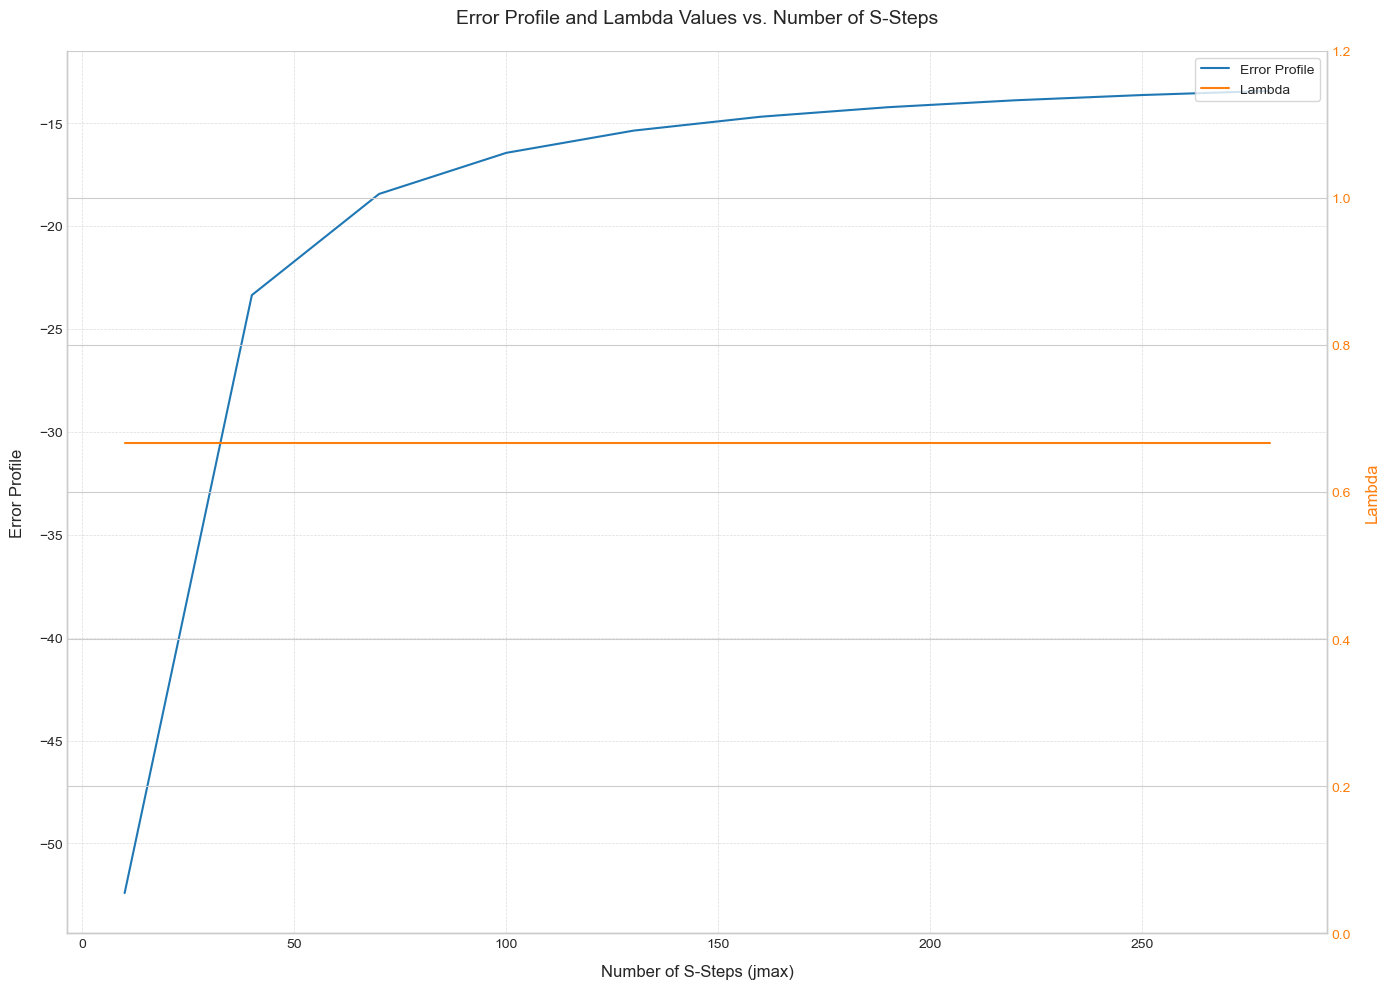

In [32]:
# plotting teh graph
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax1 = plt.subplots(figsize=(14, 10), facecolor='white')
ax1.set_facecolor('white')
line1 = ax1.plot(df['S_steps'], df['error_exp'], '-', linewidth=1.5, color='#1f77b4', label='Error Profile')
ax1.grid(True, linestyle='--', alpha=0.7, linewidth=0.5)
ax2 = ax1.twinx()
line2 = ax2.plot(df['S_steps'], df['Lambda'], '-', linewidth=1.5, color='#ff7f0e', label='Lambda')
ax1.set_xlabel('Number of S-Steps (jmax)', fontsize=12, labelpad=10)
ax1.set_ylabel('Error Profile', fontsize=12, labelpad=10)
ax2.set_ylabel('Lambda', fontsize=12, labelpad=10, color='#ff7f0e')
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='y', which='major', labelsize=10, colors='#ff7f0e')
ax2.set_ylim(0, 1.2)
plt.title('Error Profile and Lambda Values vs. Number of S-Steps', fontsize=14, pad=20)
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right', frameon=True, fancybox=True, framealpha=0.8, fontsize=10)
plt.tight_layout()
plt.show()

#### ii) For Fixed Lambda

In [18]:
jmaxmin = 10
jmaxmax = 300
jmaxstep = 30
i_min = (jmaxmax**2)*(sig_max**2)*T
coef = np.ceil(i_min/tot_days)
i_max_calc = coef*tot_days
expfd_result_fix, note_val = note_value(S0=S0, K=KI, T=547/365, r1=r1, r2=r2, D=D, sig=sig, SU=SU, jmaxmin=jmaxmin, jmaxmax=jmaxmax+1, jmaxstep=jmaxstep, imax=i_max_calc, cpn=cpn)

In [19]:
expfd_result_fix

[{'S_steps': 10, 't_steps': 21333, 'EXP': 925.3397949882782, 'Lambda': 0.6667},
 {'S_steps': 40, 't_steps': 21333, 'EXP': 954.3878392869851, 'Lambda': 0.6667},
 {'S_steps': 70, 't_steps': 21333, 'EXP': 959.3042912530574, 'Lambda': 0.6667},
 {'S_steps': 100,
  't_steps': 21333,
  'EXP': 961.3010554855799,
  'Lambda': 0.6667},
 {'S_steps': 130,
  't_steps': 21333,
  'EXP': 962.3803674020097,
  'Lambda': 0.6667},
 {'S_steps': 160,
  't_steps': 21333,
  'EXP': 963.0558266861666,
  'Lambda': 0.6667},
 {'S_steps': 190,
  't_steps': 21333,
  'EXP': 963.5182200054829,
  'Lambda': 0.6667},
 {'S_steps': 220,
  't_steps': 21333,
  'EXP': 963.8545729035773,
  'Lambda': 0.6667},
 {'S_steps': 250,
  't_steps': 21333,
  'EXP': 964.1102168272473,
  'Lambda': 0.6667},
 {'S_steps': 280,
  't_steps': 21333,
  'EXP': 964.3110794116074,
  'Lambda': 0.6667}]

In [20]:
# craete a dataframe for error analysis
df = pd.DataFrame.from_dict(expfd_result_fix)

In [21]:
# calculating teh errors
df['error_exp'] = df["EXP"] - 977.75

In [22]:
# INSPECT THE FIRST ROWS OF THE DATAFRAME
df.head()

,S_steps,t_steps,EXP,Lambda,error_exp
0,10,21333,925.339795,0.6667,-52.410205
1,40,21333,954.387839,0.6667,-23.362161
2,70,21333,959.304291,0.6667,-18.445709
3,100,21333,961.301055,0.6667,-16.448945
4,130,21333,962.380367,0.6667,-15.369633


In [23]:
# INSPECT THE LAST ROWS OF THE DATAFRAME
df.tail()

,S_steps,t_steps,EXP,Lambda,error_exp
5,160,21333,963.055827,0.6667,-14.694173
6,190,21333,963.518220,0.6667,-14.231780
7,220,21333,963.854573,0.6667,-13.895427
8,250,21333,964.110217,0.6667,-13.639783
9,280,21333,964.311079,0.6667,-13.438921


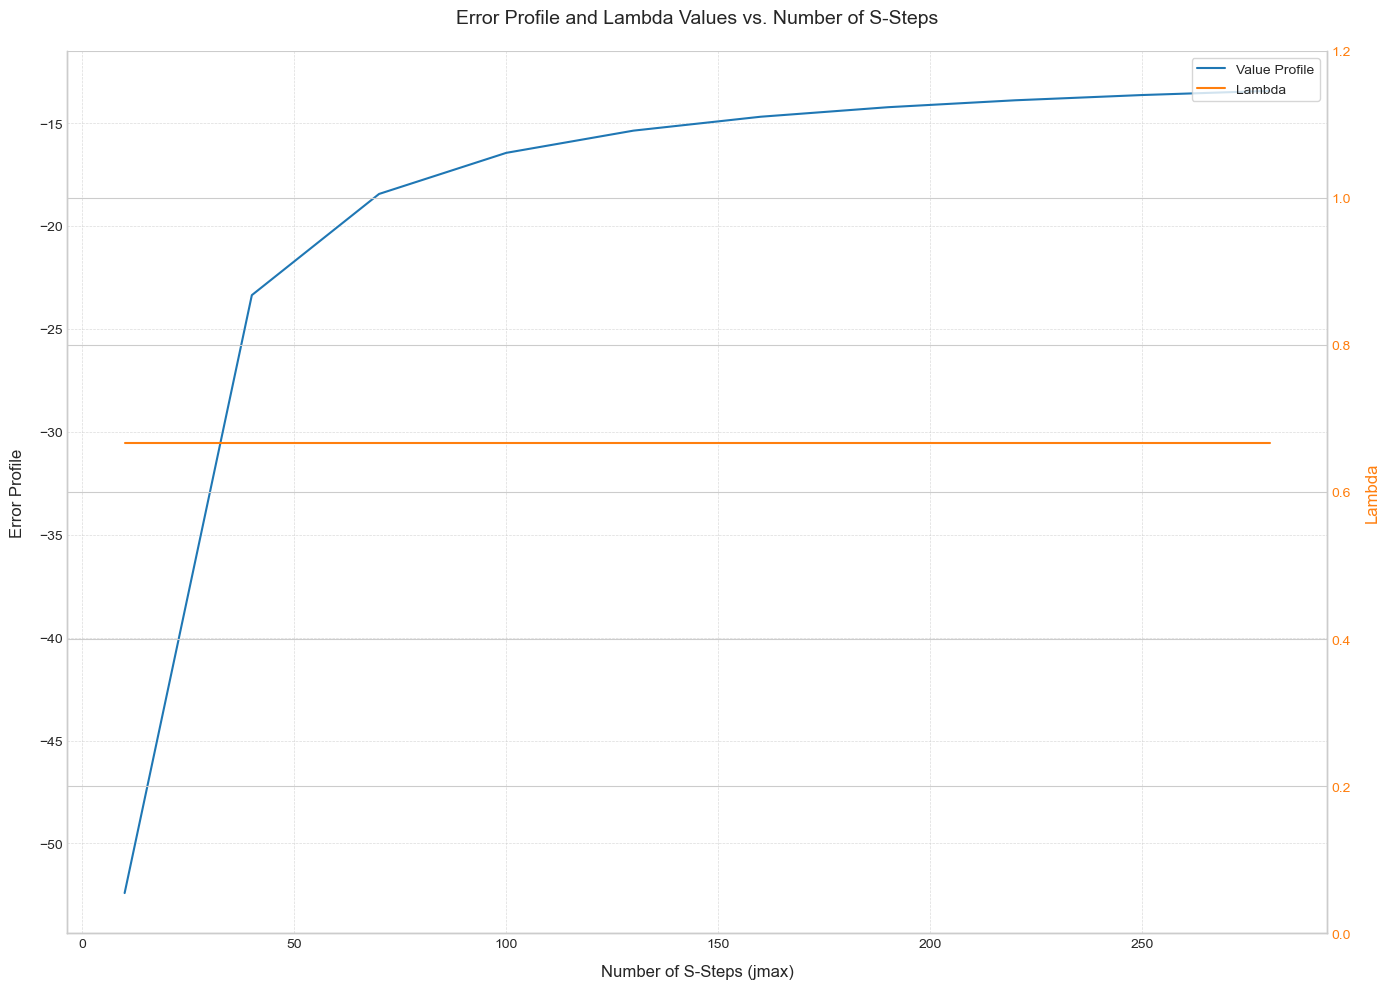

In [24]:
# plotting teh graph
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax1 = plt.subplots(figsize=(14, 10), facecolor='white')
ax1.set_facecolor('white')
line1 = ax1.plot(df['S_steps'], df['error_exp'], '-', linewidth=1.5, color='#1f77b4', label='Value Profile')
ax1.grid(True, linestyle='--', alpha=0.7, linewidth=0.5)
ax2 = ax1.twinx()
line2 = ax2.plot(df['S_steps'], df['Lambda'], '-', linewidth=1.5, color='#ff7f0e', label='Lambda')
ax1.set_xlabel('Number of S-Steps (jmax)', fontsize=12, labelpad=10)
ax1.set_ylabel('Error Profile', fontsize=12, labelpad=10)
ax2.set_ylabel('Lambda', fontsize=12, labelpad=10, color='#ff7f0e')
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='y', which='major', labelsize=10, colors='#ff7f0e')
ax2.set_ylim(0, 1.2)
plt.title('Error Profile and Lambda Values vs. Number of S-Steps', fontsize=14, pad=20)
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right', frameon=True, fancybox=True, framealpha=0.8, fontsize=10)
plt.tight_layout()
plt.show()

#### iii) Sensitivity Analysis for 300 S-steps and fixed lambda while changing the (implied volatility) sigma values

In [25]:
sigma_moneyness = {
    70.00: 0.39547,
    75.00: 0.38099,
    80.00: 0.36785,
    85.00: 0.35924,
    90.00: 0.35335,
    95.00: 0.35164,
    100.00: 0.35212,
    105.00: 0.35554,
    110.00: 0.36095
}

In [26]:
sig_values = list(sigma_moneyness.values())

In [27]:
sig_values

[0.39547,
 0.38099,
 0.36785,
 0.35924,
 0.35335,
 0.35164,
 0.35212,
 0.35554,
 0.36095]

In [28]:
jmaxmax = 300
jmaxstep = 1
i_min = (jmaxmax**2)*(sig_max**2)*T
coef = np.ceil(i_min/tot_days)
i_max_calc = coef*tot_days
val_store = []
for sig1 in sig_values:
    expfd_result_fix, note_val = note_value(S0=S0, K=KI, T=547/365, r1=r1, r2=r2, D=D, sig=sig1, SU=SU, jmaxmin=jmaxmax, jmaxmax=jmaxmax+1, jmaxstep=jmaxstep, imax=i_max_calc, cpn=cpn)
    output = {'Sigma': sig1, 'Note Value': note_val}
    print(output)
    val_store.append(output)

{'Sigma': 0.39547, 'Note Value': 947.0775024923839}
{'Sigma': 0.38099, 'Note Value': 952.7807010721406}
{'Sigma': 0.36785, 'Note Value': 958.0566506808246}
{'Sigma': 0.35924, 'Note Value': 961.5709041176617}
{'Sigma': 0.35335, 'Note Value': 964.0030490355955}
{'Sigma': 0.35164, 'Note Value': 964.7136177042951}
{'Sigma': 0.35212, 'Note Value': 964.5139532746852}
{'Sigma': 0.35554, 'Note Value': 963.0959837745635}
{'Sigma': 0.36095, 'Note Value': 960.8691502541924}


In [29]:
df_sig = pd.DataFrame(val_store)
df_sig

,Sigma,Note Value
0,0.39547,947.077502
1,0.38099,952.780701
2,0.36785,958.056651
3,0.35924,961.570904
4,0.35335,964.003049
5,0.35164,964.713618
6,0.35212,964.513953
7,0.35554,963.095984
8,0.36095,960.869150


In [30]:
# calculating teh errors
df_sig['error'] = df_sig["Note Value"] - 977.75
sigma_mapping = {v: k for k, v in sigma_moneyness.items()}
df_sig['Moneyness'] = df_sig['Sigma'].map(sigma_mapping)
df_sig

,Sigma,Note Value,error,Moneyness
0,0.39547,947.077502,-30.672498,70.0
1,0.38099,952.780701,-24.969299,75.0
2,0.36785,958.056651,-19.693349,80.0
3,0.35924,961.570904,-16.179096,85.0
4,0.35335,964.003049,-13.746951,90.0
5,0.35164,964.713618,-13.036382,95.0
6,0.35212,964.513953,-13.236047,100.0
7,0.35554,963.095984,-14.654016,105.0
8,0.36095,960.869150,-16.880850,110.0


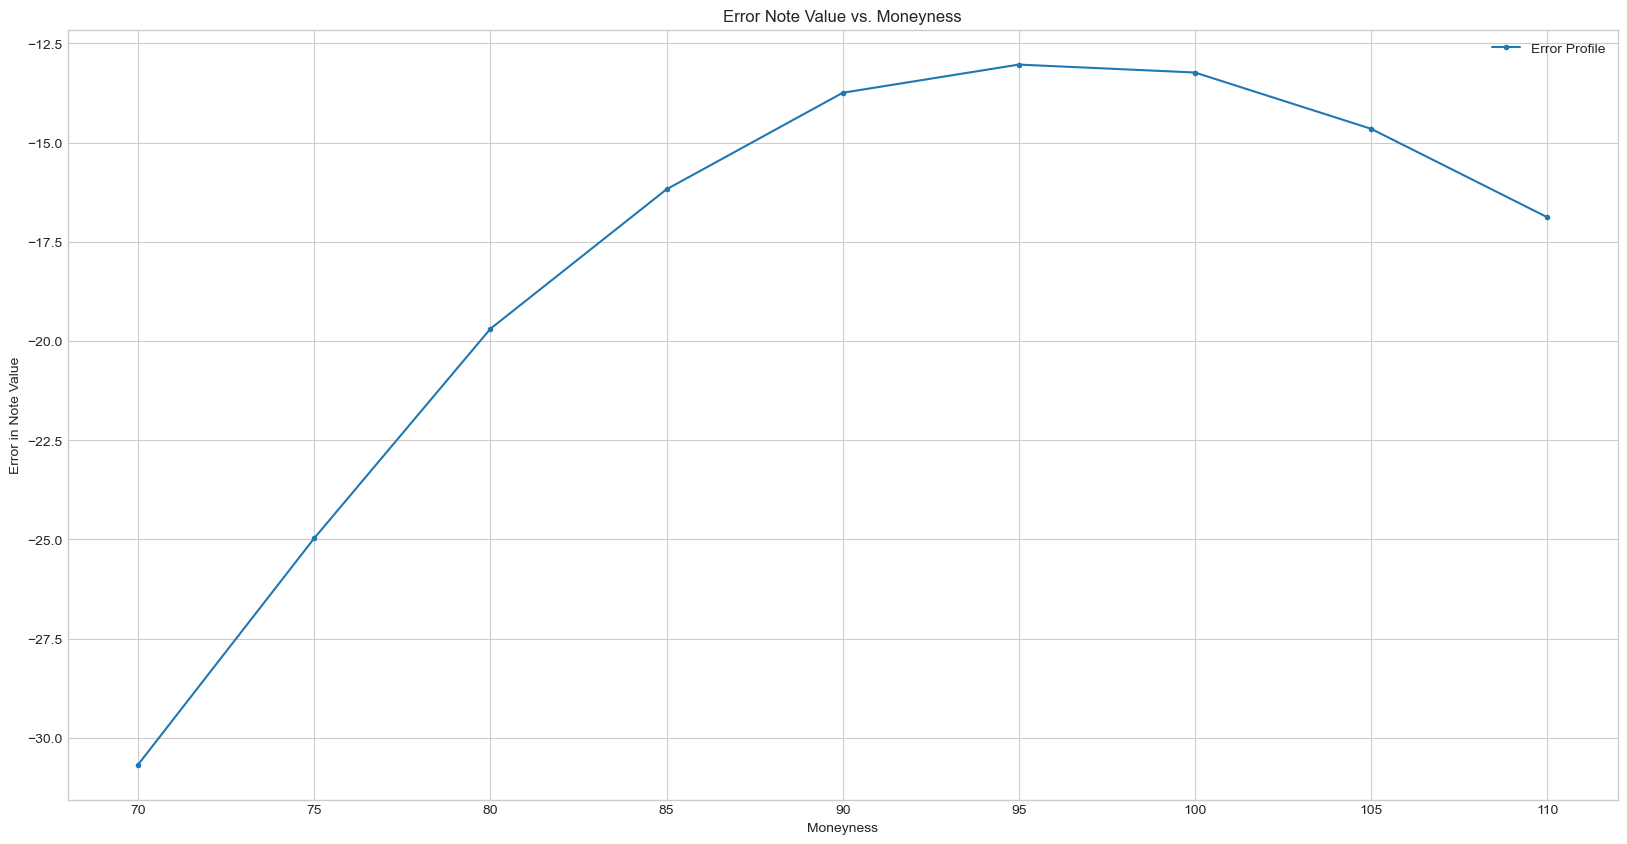

In [31]:
# plotting the error results
plt.figure(figsize=(20, 10))
plt.plot(df_sig['Moneyness'],df_sig['error'],'o-', markersize=3, label='Error Profile')
plt.xlabel('Moneyness')
plt.ylabel('Error in Note Value')
plt.title('Error Note Value vs. Moneyness')
plt.legend()
plt.grid(True)
plt.show()

# We see from above that 95 moneyness has teh least error. So changing the sigma corresponding to 95 Moneyness in valuations

---

---

<div style="border-bottom: 2px solid black; display: inline-block; text-align: center; margin: 20px;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 28px;">End of Project 3</span>
</div>

---